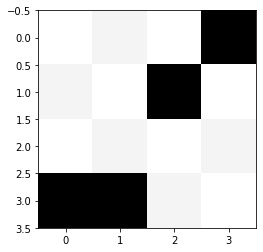

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint 

class Board():
    def __init__(self,N: int) -> None:
        self.first_coordinate = N
        self.second_coordinate = N
        self.game_board = None

    def builder(self) -> np.array:
        self.game_board = np.zeros((self.first_coordinate, self.second_coordinate))
        self.game_board[1::2, 0::2] = 1
        self.game_board[0::2, 1::2] = 1
        
        return self.game_board

    def queens_generator(self, board: np.array) -> np.array:
        for j in range(len(board)):
            queens_row = randint(0, len(board) - 1)
            queens_column = j
            board[queens_row, queens_column] = 22 # this integer number gives the red color

        plt.imshow(board, cmap='binary')
        
        return board
            
def main():
    sizes = [int(element) for element in input("Enter the board's size: ").split()]
    board = Board(sizes[0])
    game_board = board.builder()

    boards = []

    for _ in range(1):
        board_with_queens = board.queens_generator(game_board)
        boards.append(board_with_queens)
    

if __name__ == '__main__':
    main()